In [2]:
tree = Signal('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_tttm/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root')

/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_tttm/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root


In [3]:
ak.sum(tree.HX_pt > tree.H1_pt) / len(tree.HX_pt)

0.9412026935078952

In [2]:
ak.sum(tree.HX_b1_genHflag == 0) / len(tree.HX_b1_genHflag)

0.31177754251020895

In [10]:
nfound_presel_b = ak.sum(tree.jet_signalId > -1, axis=1)
nfound_presel_b

<Array [6, 5, 6, 6, 5, 6, ... 4, 6, 6, 5, 5, 5] type='42621 * int64'>

In [6]:
# HX_found = (tree.HX_b1_genHflag == 0) & (tree.HX_b2_genHflag == 0)
# H1_found = (tree.H1_b1_genHflag == 1) & (tree.H1_b2_genHflag == 1)
# H2_found = (tree.H2_b1_genHflag == 2) & (tree.H2_b2_genHflag == 2)

H_b_genHflags = np.column_stack((tree.np('HX_b1_genHflag'), tree.np('HX_b2_genHflag'), tree.np('H1_b1_genHflag'), tree.np('H1_b2_genHflag'), tree.np('H2_b1_genHflag'), tree.np('H2_b2_genHflag')))

In [7]:
H_b_genHflags

array([[ 0,  0,  1,  1,  2,  2],
       [-1,  0,  1,  2,  1,  0],
       [ 1,  1,  0,  2,  2,  0],
       ...,
       [ 1,  0, -1,  0,  2,  1],
       [ 1,  1,  0,  2,  0, -1],
       [ 0,  0,  1, -1,  2,  1]], dtype=int32)

In [8]:
nfound_sig_b = (H_b_genHflags > -1).sum(axis=1)

In [9]:
nfound_sig_b

array([6, 5, 6, ..., 5, 5, 5])

In [ ]:
found_HX_select = (H_b_genHflags == 0).sum(axis=1) == 2
found_H1_select = (H_b_genHflags == 1).sum(axis=1) == 2
found_H2_select = (H_b_genHflags == 2).sum(axis=1) == 2

n_H_selected = np.sum(np.column_stack((found_HX_select, found_H1_select, found_H2_select)), axis=1)
n_H_selected.max()

3

In [ ]:
HX_found = (tree.HX_b1_genHflag == 0) & (tree.HX_b2_genHflag == 0)
H1_found = (tree.H1_b1_genHflag == 1) & (tree.H1_b2_genHflag == 1)
H2_found = (tree.H2_b1_genHflag == 2) & (tree.H2_b2_genHflag == 2)


n_h_paired = np.sum(np.column_stack((HX_found, H1_found, H2_found)), axis=1)
all_H_found = HX_found & H1_found & H2_found

n_h_paired

<Array [3, 0, 1, 0, 1, 0, ... 0, 0, 0, 0, 0, 0] type='46283 * int64'>

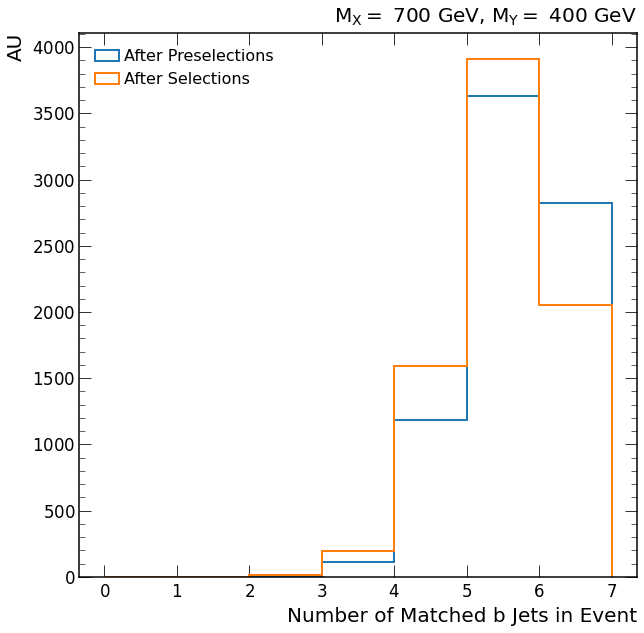

In [14]:
fig, ax = plt.subplots()

_ = tree.hist(nfound_presel_b, bins=np.arange(8), ax=ax, label='After Preselections')
_ = tree.hist(nfound_sig_b, bins=np.arange(8), ax=ax, label='After Selections')

ax.set_xlabel('Number of Matched b Jets in Event')

ax.legend(loc=2)

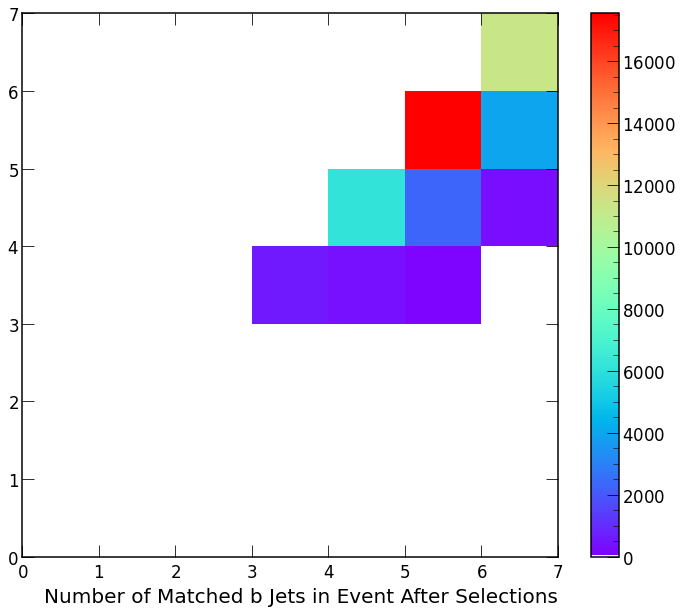

In [15]:
fig, ax = plt.subplots(figsize=(12,10))

n, ex, ey, im = Hist2d(nfound_presel_b, nfound_sig_b, bins=np.arange(8), ax=ax)

ax.set_xlabel('Number of Matched b Jets in Event After Preselections')
ax.set_xlabel('Number of Matched b Jets in Event After Selections')

fig.colorbar(im, ax=ax)

ax.set_xticks(np.arange(8))
ax.set_yticks(np.arange(8))


ax.minorticks_off()

# fig.savefig(f'plots/3_hlo_reconstruction/btag_pt/{tree.mxmy}_nH_2D.pdf')

(array([0.01207787, 0.19508243, 0.54168917, 0.25115053]),
 array([0.70101333, 0.21975671, 0.03323034, 0.04599961]))

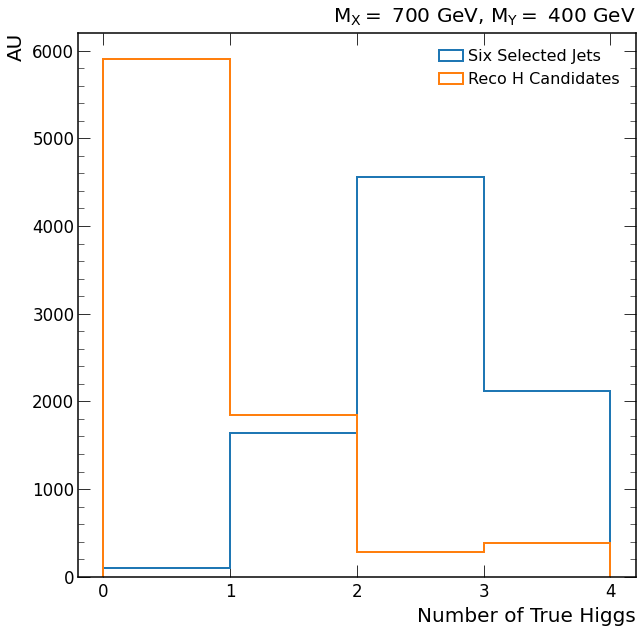

In [ ]:
fig, ax = plt.subplots()

n1 = tree.hist(n_H_selected, bins=np.arange(5), ax=ax, label='Six Selected Jets')
n2 = tree.hist(n_h_paired, bins=np.arange(5), ax=ax, label='Reco H Candidates')
# n3 = tree.hist(n_h_paired[n_H_selected == 3], bins=np.arange(5), ax=ax)

# ax.set_ylim(0, 6000)

ax.set_xlabel('Number of True Higgs')

fig.savefig(f'plots/3_hlo_reconstruction/btag_pt/{tree.mxmy}_nH_1D.pdf')

n1/n1.sum(), n2/n2.sum()

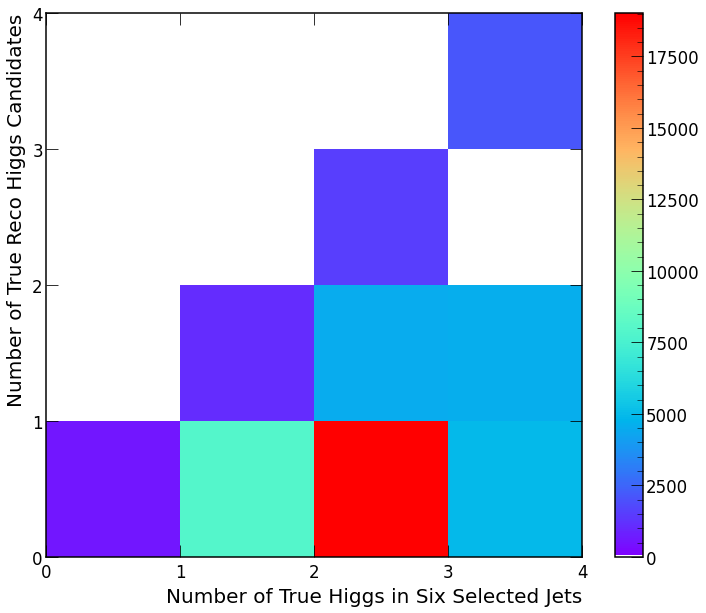

In [7]:
fig, ax = plt.subplots(figsize=(12,10))

n, ex, ey, im = Hist2d(n_H_selected, n_h_paired, bins=np.arange(5), ax=ax)

ax.set_xlabel('Number of True Higgs in Six Selected Jets')
ax.set_ylabel('Number of True Reco Higgs Candidates')

fig.colorbar(im, ax=ax)

ax.set_xticks(np.arange(5))
ax.set_yticks(np.arange(5))

ax.minorticks_off()

fig.savefig(f'plots/3_hlo_reconstruction/btag_pt/{tree.mxmy}_nH_2D.pdf')